<a href="https://colab.research.google.com/github/itsMaadh/fuzzy-stocks/blob/main/MNIST_Image_data_DNN_gridsearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images. More info can be found at the MNIST homepage.

In [ ]:
from keras.datasets import mnist

(x_train, y_train),(x_test,y_test) = mnist.load_data()


In [ ]:
print("x_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("x_test shape", x_test.shape)
print("y_test shape", y_test.shape)

x_train shape (60000, 28, 28)
y_train shape (60000,)
x_test shape (10000, 28, 28)
y_test shape (10000,)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from keras import initializers
from keras import regularizers

#Flattening the images from the 28x28 pixels to 1D 784 pixels
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#normalizing the data to help with the training

x_train /= 255
x_test /=255

#one-hot encoding
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

print("Shape before OHC:", y_train.shape)
print("Shape after OHC:", Y_train.shape)

Shape before OHC: (60000,)
Shape after OHC: (60000, 10)


In [ ]:
L1 = 200
L2 = 100
L3 = 50

model = Sequential()
model.add(Dense(L1,input_dim=784, activation ='relu', kernel_initializer='he_normal',kernel_regularizer = regularizers.l2(0.01)))
model.add(Dense(L2,activation='relu'))
model.add(Dense(L3,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer ='adam')

In [ ]:
history = model.fit(x_train,Y_train,epochs=10,batch_size=100, validation_data=(x_test,Y_test))


Epoch 1/10
600/600 [==============================] - 6s 8ms/step - loss: 0.7868 - accuracy: 0.9035 - val_loss: 0.3240 - val_accuracy: 0.9362
Epoch 2/10
600/600 [==============================] - 3s 6ms/step - loss: 0.2895 - accuracy: 0.9478 - val_loss: 0.2356 - val_accuracy: 0.9620
Epoch 3/10
600/600 [==============================] - 3s 6ms/step - loss: 0.2576 - accuracy: 0.9546 - val_loss: 0.2418 - val_accuracy: 0.9581
Epoch 4/10
600/600 [==============================] - 4s 7ms/step - loss: 0.2402 - accuracy: 0.9584 - val_loss: 0.2325 - val_accuracy: 0.9567
Epoch 5/10
600/600 [==============================] - 3s 6ms/step - loss: 0.2224 - accuracy: 0.9625 - val_loss: 0.2195 - val_accuracy: 0.9609
Epoch 6/10
600/600 [==============================] - 3s 5ms/step - loss: 0.2113 - accuracy: 0.9639 - val_loss: 0.2141 - val_accuracy: 0.9634
Epoch 7/10
600/600 [==============================] - 4s 6ms/step - loss: 0.2021 - accuracy: 0.9650 - val_loss: 0.1944 - val_accuracy: 0.9684
Epoch 

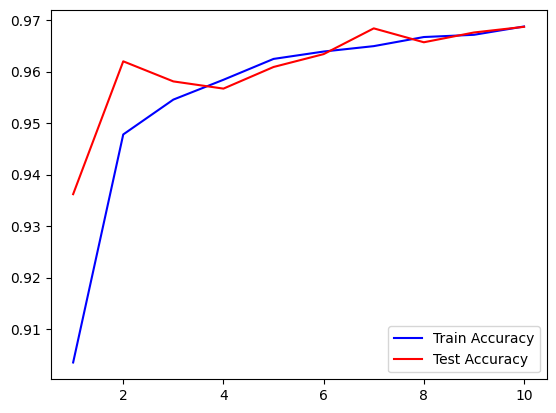

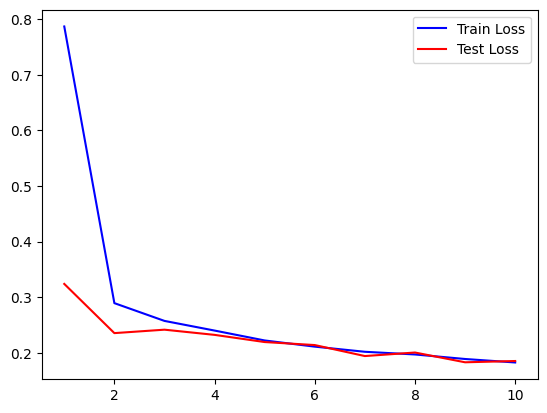

In [ ]:
import matplotlib.pyplot as plt
acc2 = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss2 = history.history['loss']
val_loss= history.history['val_loss']

epochs =range(1,len(acc2)+1)
plt.plot(epochs, acc2,'b',label='Train Accuracy')
plt.plot(epochs, val_acc,'r',label='Test Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs,loss2,'b',label='Train Loss')
plt.plot(epochs,val_loss,'r',label='Test Loss')
plt.legend()
plt.show()

In [ ]:
from keras.callbacks import EarlyStopping

early_stopping_monitor = EarlyStopping(patience=3)
history = model.fit(x_train,Y_train, epochs=30,batch_size=100,validation_data=(x_test,Y_test), callbacks=[early_stopping_monitor])

Epoch 1/30
600/600 [==============================] - 3s 6ms/step - loss: 0.1779 - accuracy: 0.9696 - val_loss: 0.1746 - val_accuracy: 0.9714
Epoch 2/30
600/600 [==============================] - 3s 5ms/step - loss: 0.1808 - accuracy: 0.9687 - val_loss: 0.1910 - val_accuracy: 0.9648
Epoch 3/30
600/600 [==============================] - 4s 7ms/step - loss: 0.1728 - accuracy: 0.9705 - val_loss: 0.1739 - val_accuracy: 0.9697
Epoch 4/30
600/600 [==============================] - 4s 6ms/step - loss: 0.1676 - accuracy: 0.9714 - val_loss: 0.1712 - val_accuracy: 0.9702
Epoch 5/30
600/600 [==============================] - 3s 5ms/step - loss: 0.1718 - accuracy: 0.9704 - val_loss: 0.1826 - val_accuracy: 0.9660
Epoch 6/30
600/600 [==============================] - 3s 5ms/step - loss: 0.1656 - accuracy: 0.9721 - val_loss: 0.1670 - val_accuracy: 0.9716
Epoch 7/30
600/600 [==============================] - 4s 7ms/step - loss: 0.1627 - accuracy: 0.9721 - val_loss: 0.1862 - val_accuracy: 0.9665
Epoch 

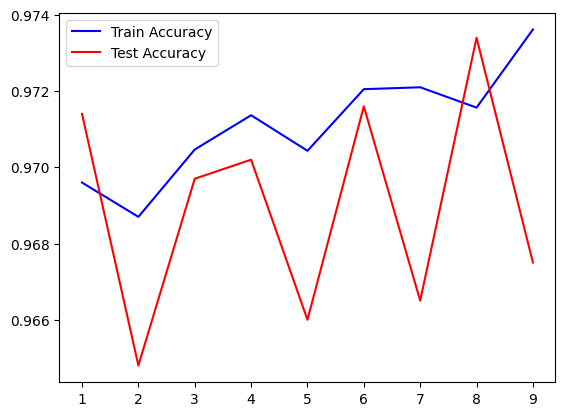

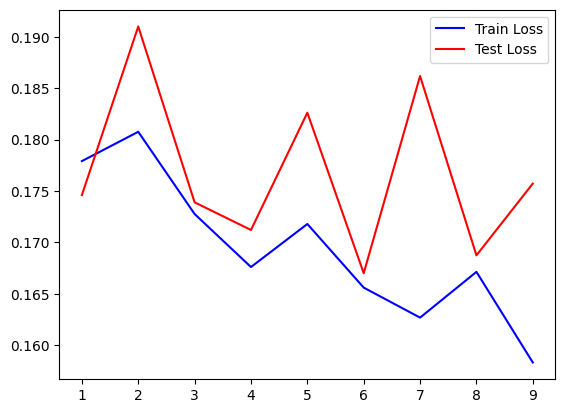

In [ ]:
import matplotlib.pyplot as plt
acc2 = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss2 = history.history['loss']
val_loss= history.history['val_loss']

epochs =range(1,len(acc2)+1)
plt.plot(epochs, acc2,'b',label='Train Accuracy')
plt.plot(epochs, val_acc,'r',label='Test Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs,loss2,'b',label='Train Loss')
plt.plot(epochs,val_loss,'r',label='Test Loss')
plt.legend()
plt.show()